In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Wine Quality Data Set\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Preprocessing 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

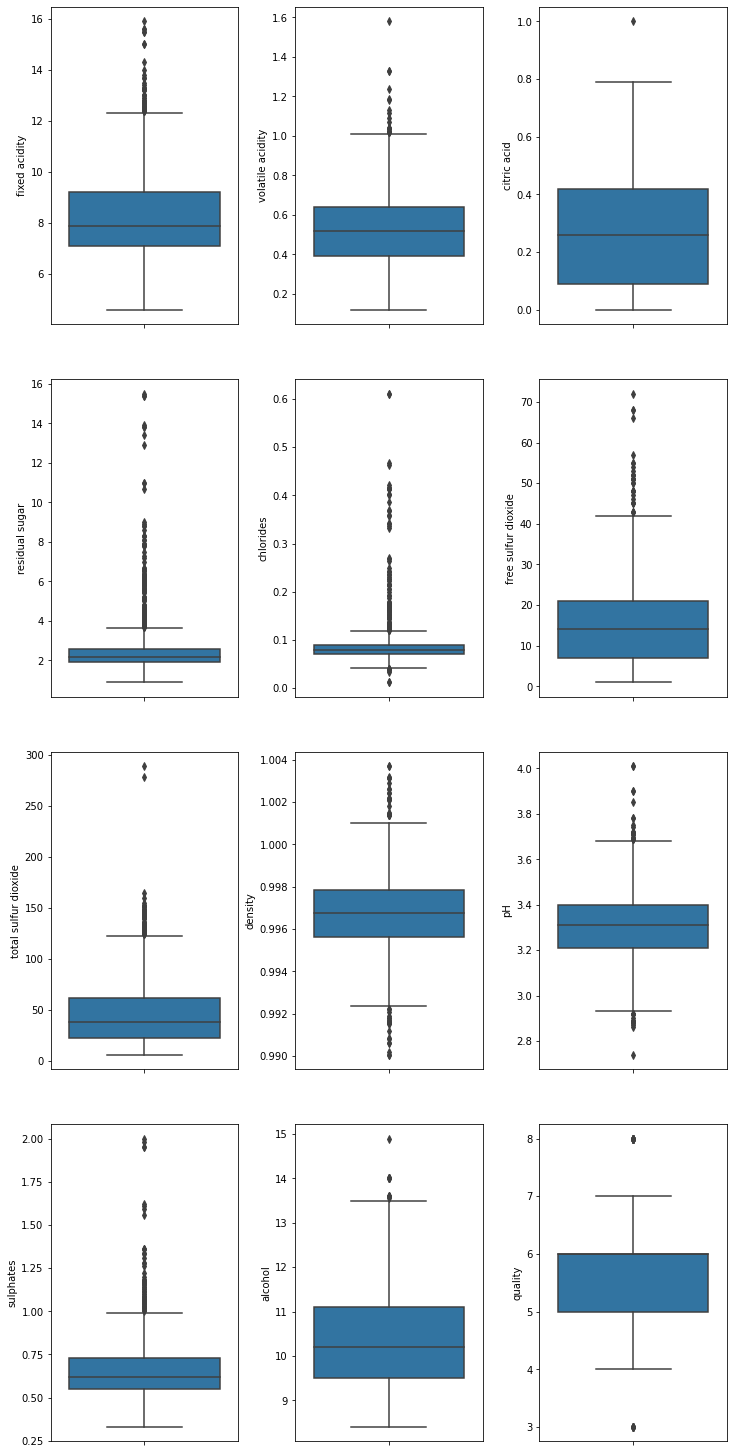

In [6]:
# Exploratory data analysis...
# creating boxplots
fig, ax = plt.subplots(ncols=3, nrows=4, figsize = (10,20))
index = 0

ax = ax.flatten()

for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = .0, w_pad=.7, h_pad=5.0)

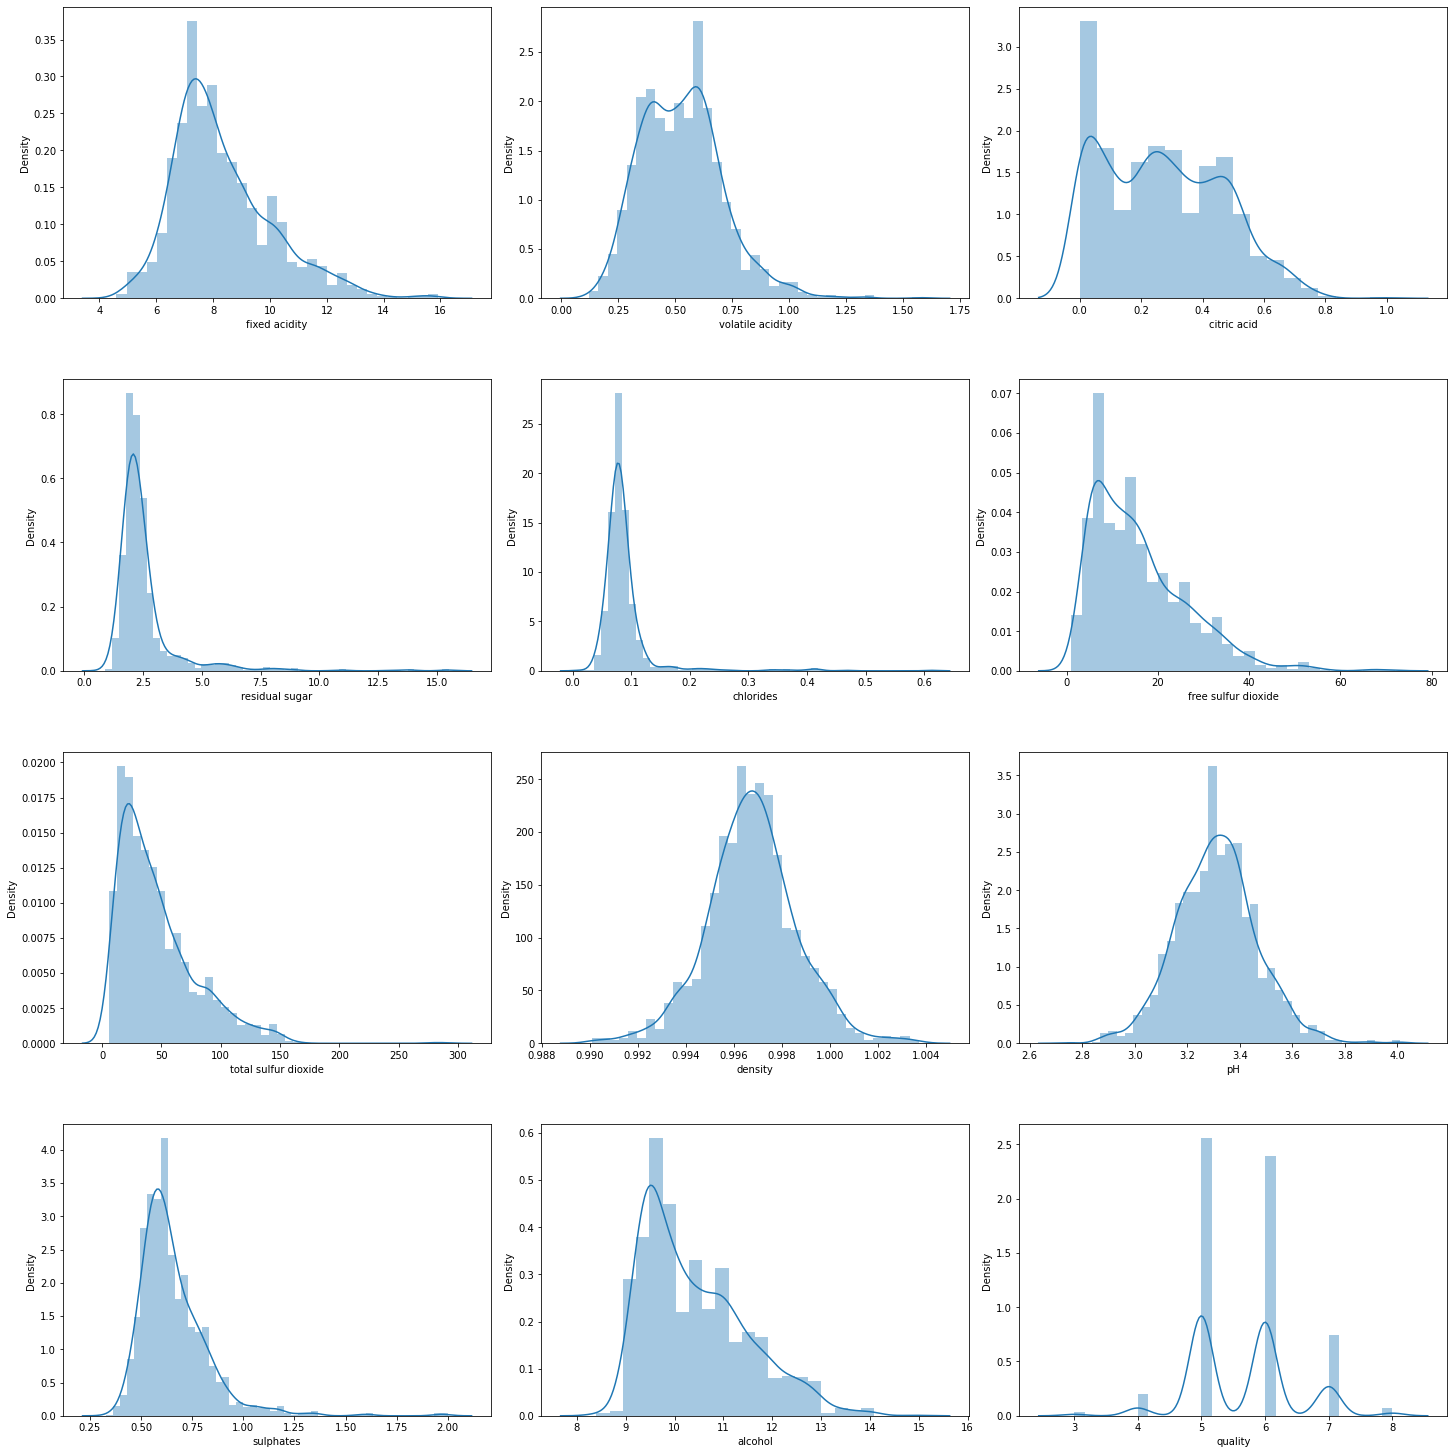

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize = (20,20))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad = .0, w_pad=.7, h_pad=5.0)

In [8]:
from scipy import stats
z = np.abs(stats.zscore(df))
# print(z)
threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [9]:
print(z[13][9])

5.32210116796055


In [10]:
df = df[(z < 3).all(axis=1)]

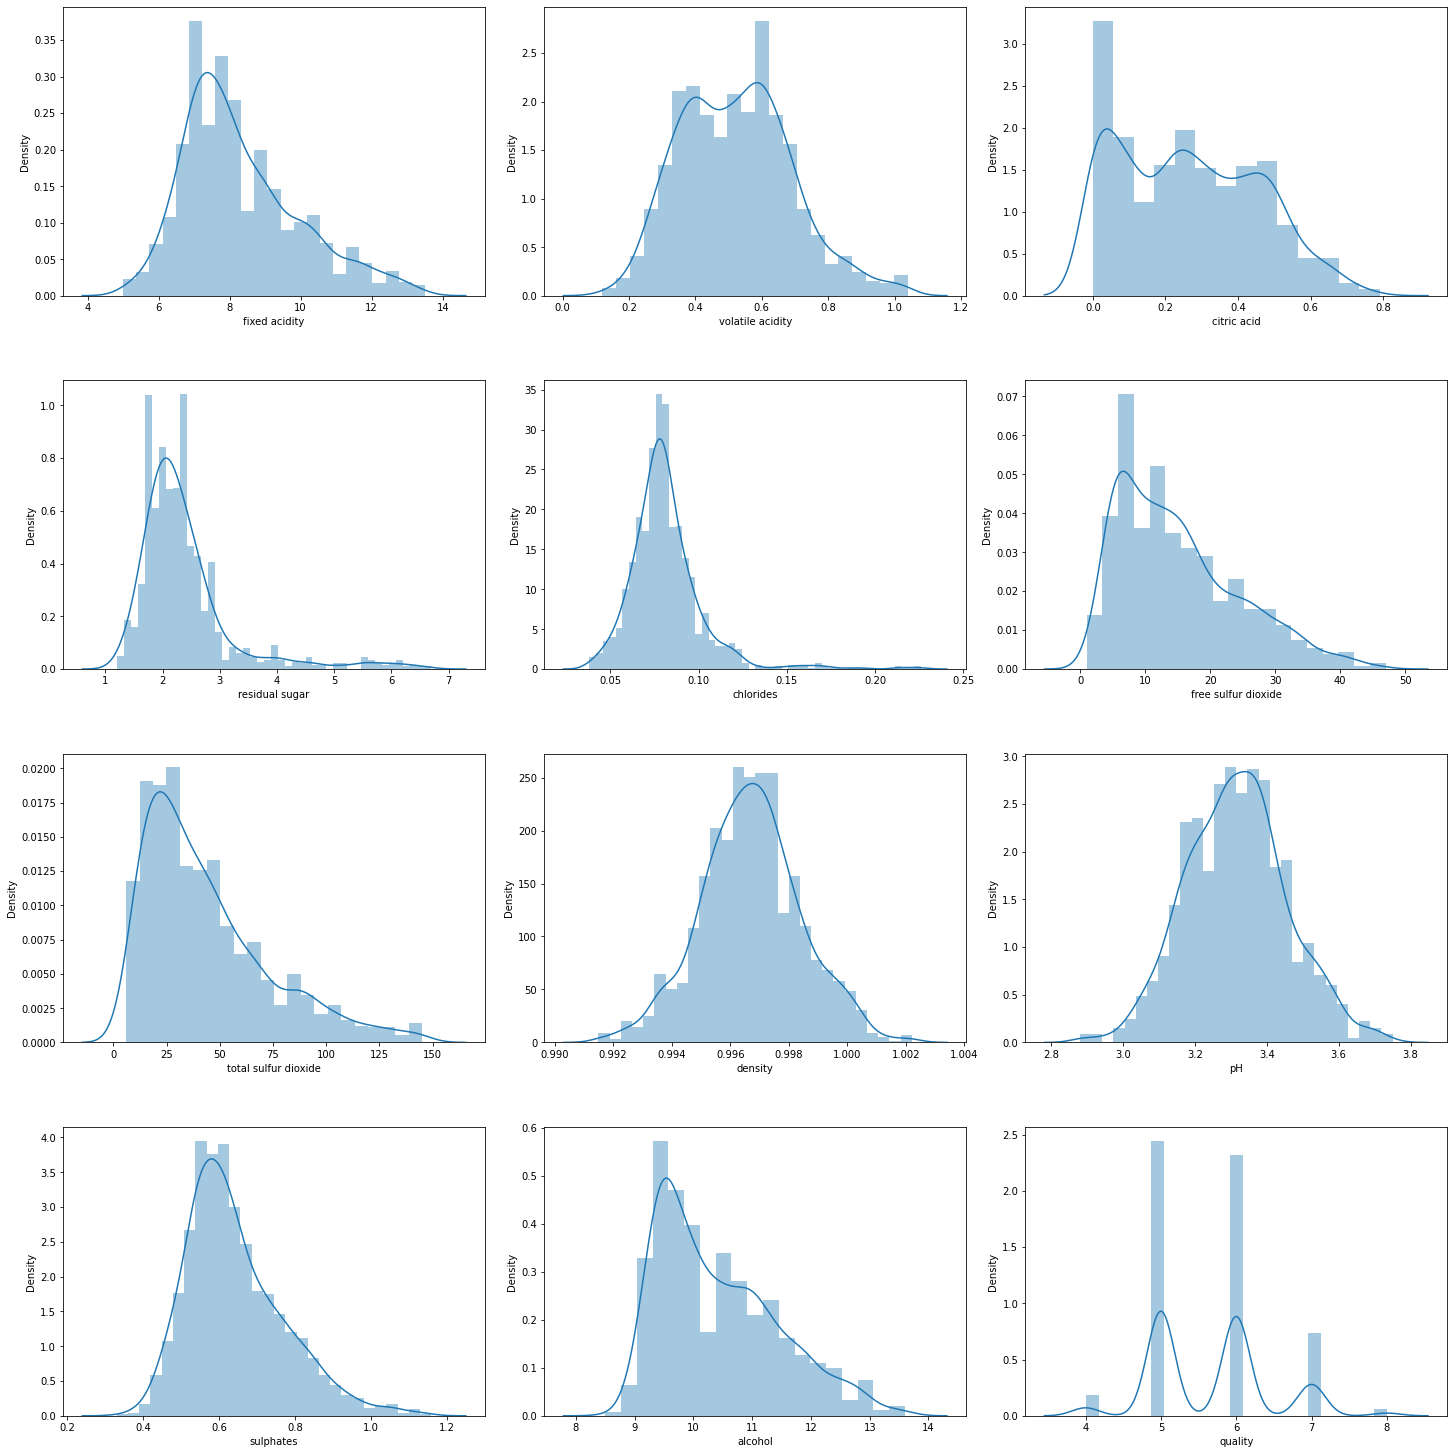

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize = (20,20))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad = .0, w_pad=.7, h_pad=5.0)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

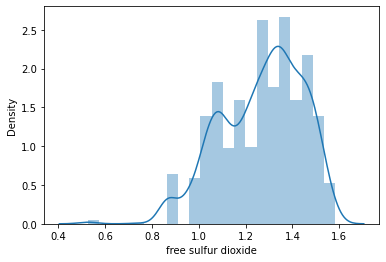

In [28]:

# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

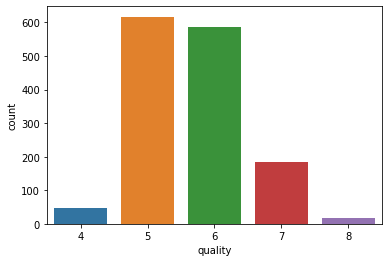

In [12]:
sns.countplot(df['quality'])

<AxesSubplot:>

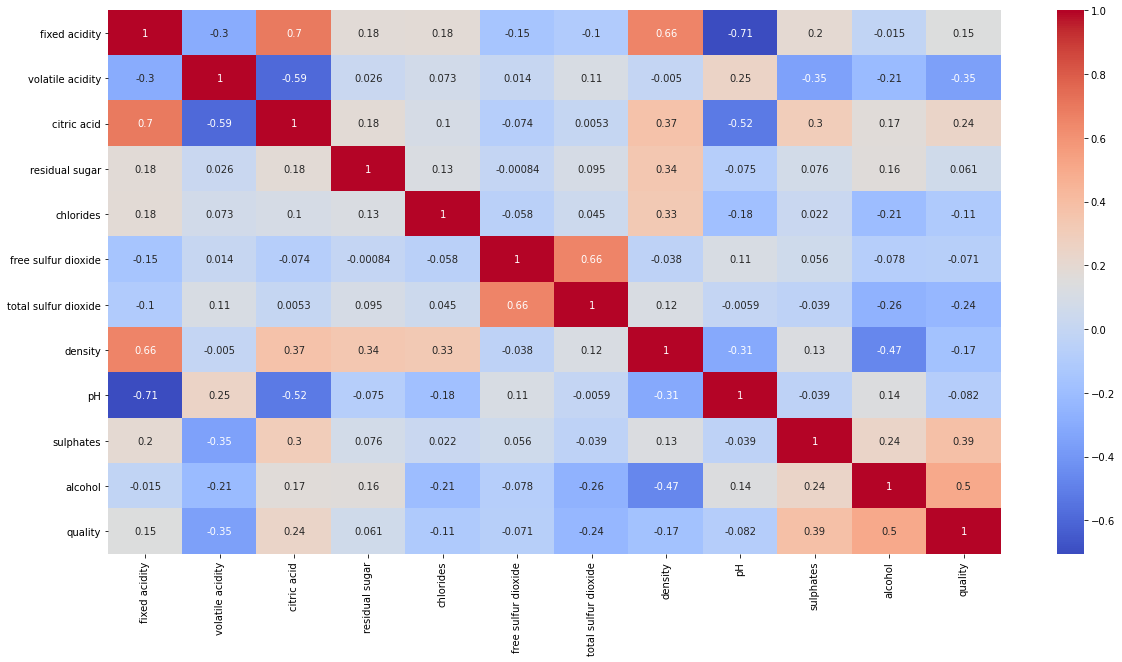

In [13]:
# Coorrelation Matrix 
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [181]:
# Spliting inputs data
x = df.drop(columns=['quality','total sulfur dioxide','fixed acidity','density'])
y = df['quality']

<AxesSubplot:>

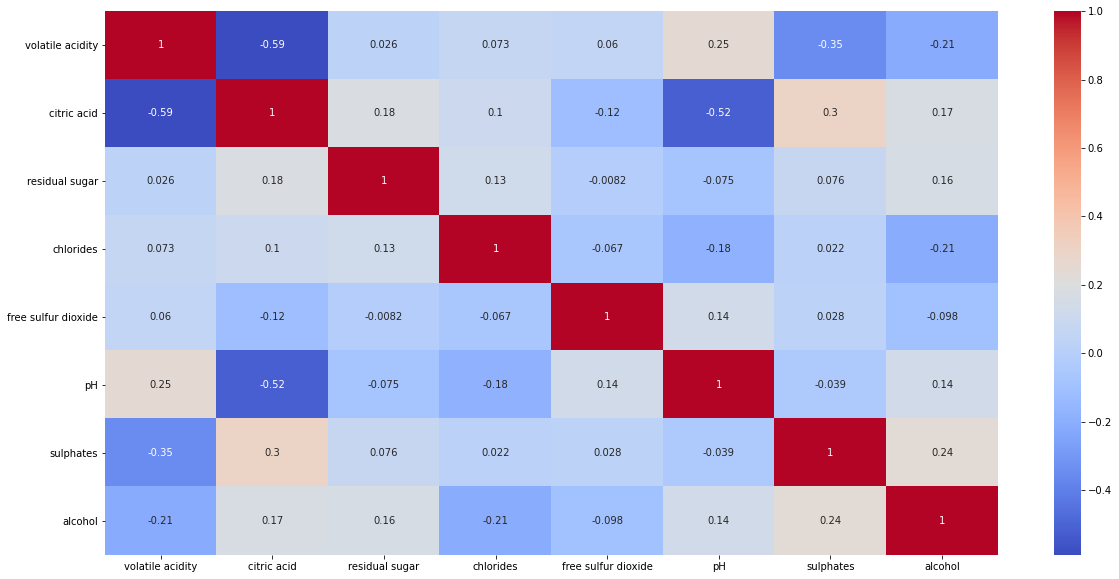

In [182]:
# Coorrelation Matrix 
corr = x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [183]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [184]:
# Class Imbalancement

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors = 4) 

# transform dataset
x, y = oversample.fit_resample(x, y)

In [185]:
y.value_counts()

7    617
5    617
8    617
6    617
4    617
Name: quality, dtype: int64

In [186]:
# Model Training
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=40)
    #train the model and predict
    model.fit(x_train, y_train)
    print(f'Accuracy : {model.score(x_test, y_test)*100}')
    
#     cross-validation
    score = cross_val_score(model, x, y, cv=5)
    print(f'Cross validation score : {np.mean(score)*100}')

In [187]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy : 49.0280777537797
Cross validation score : 50.24311183144247


In [188]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x ,y)

Accuracy : 74.19006479481641
Cross validation score : 71.02106969205835


In [189]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x ,y)

Accuracy : 82.6133909287257
Cross validation score : 78.34683954619125


In [190]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x ,y)

Accuracy : 83.69330453563715
Cross validation score : 79.28687196110211


In [191]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, x,y)

[19:47:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 81.53347732181425
[19:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:45] WARNING: C:/Users/Administr

In [192]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, x, y)

Accuracy : 81.6414686825054
Cross validation score : 78.28200972447326
